In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import json

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=MYDEVICE;'
    'DATABASE=sales;'
    'Trusted_Connection=yes;'
)

In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.users_data"
df = pd.read_sql(query, conn)

df 

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


In [5]:
df.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5


In [6]:
df.tail()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3
1999,1999,19,69,2000,12,Male,1749 Spruce Street,31.059999,-98.180000,16744.0,34134.0,0.0,683,2


In [7]:
df.shape

(2000, 14)

In [8]:
df.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [10]:
df.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.879999,-159.410004,0.000000,1.000000,0.000000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837501,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440002,20581.000000,40744.500000,58251.000000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200001,-80.129997,26286.000000,52698.500000,89070.500000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200001,-68.669998,163145.000000,307018.000000,516263.000000,850.000000,9.000000


In [11]:
df.describe(include="O")

,gender,address
count,2000,2000
unique,2,1999
top,Female,506 Washington Lane
freq,1016,2


In [12]:
df.isna().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

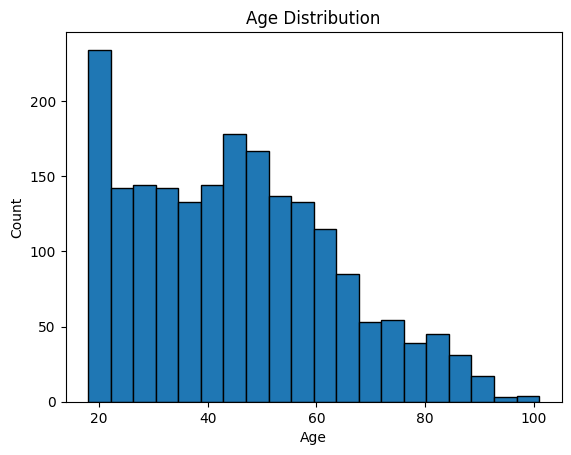

In [20]:
plt.hist(df["current_age"], bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


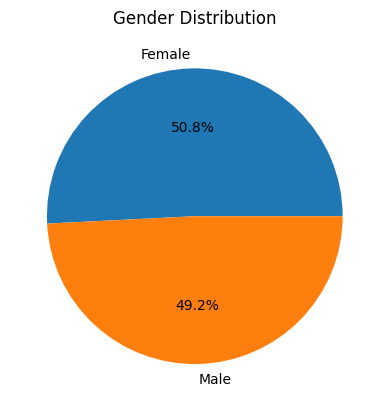

In [21]:
df["gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


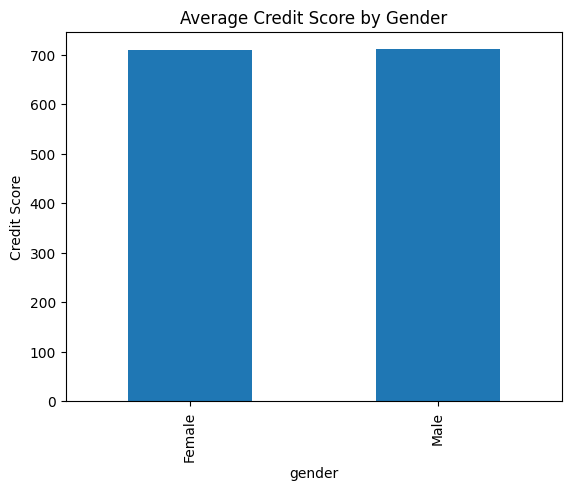

In [22]:
df.groupby("gender")["credit_score"].mean().plot(kind="bar")
plt.title("Average Credit Score by Gender")
plt.ylabel("Credit Score")
plt.show()

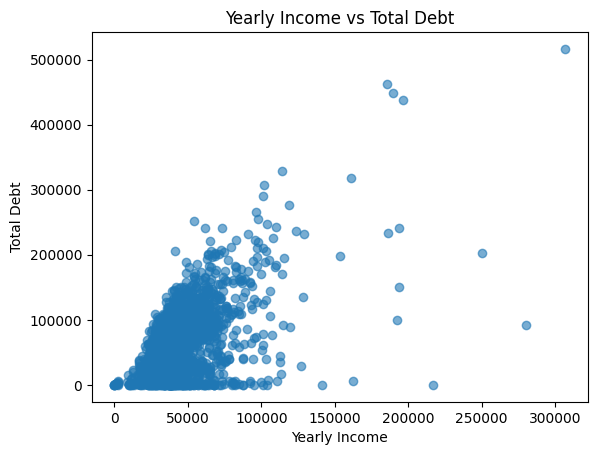

In [23]:
plt.scatter(df["yearly_income"], df["total_debt"], alpha=0.6)
plt.title("Yearly Income vs Total Debt")
plt.xlabel("Yearly Income")
plt.ylabel("Total Debt")
plt.show()

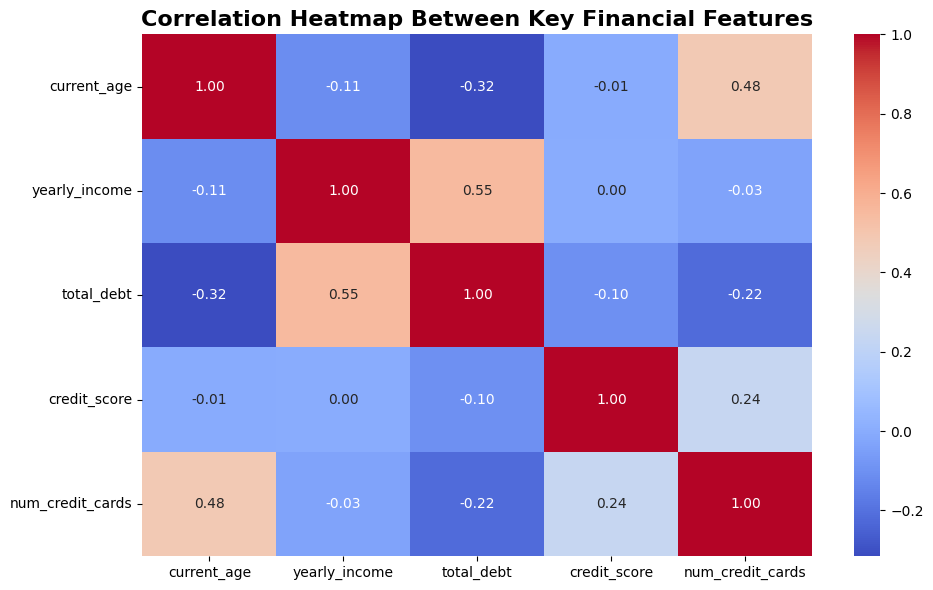

In [25]:
numeric_cols = df[['current_age', 'yearly_income', 'total_debt', 
                   'credit_score', 'num_credit_cards']]


corr = numeric_cols.corr()


plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,       
    cmap='coolwarm',   
    fmt=".2f",         
  
      
)
plt.title("Correlation Heatmap Between Key Financial Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
df['income_bin'] = pd.qcut(df['yearly_income'], q=5, labels=['Very Low','Low','Medium','High','Very High'])


pivot_df = df.pivot_table(index='current_age',columns='income_bin',values='yearly_income',aggfunc='mean')
pivot_df

income_bin,Very Low,Low,Medium,High,Very High
current_age,,,,,
18,28866.333333,33760.625000,41608.785714,50083.095238,81138.000000
19,28893.500000,32652.777778,41595.000000,51383.750000,84571.857143
20,28682.000000,35183.666667,40547.750000,49046.500000,64621.857143
21,26754.333333,34674.166667,41802.000000,49878.875000,91831.900000
22,21617.142857,34595.428571,41552.571429,50541.363636,80037.000000
...,...,...,...,...,...
93,10782.000000,NaN,NaN,NaN,NaN
94,NaN,NaN,40787.000000,NaN,60080.000000
98,NaN,33869.000000,42306.000000,NaN,NaN


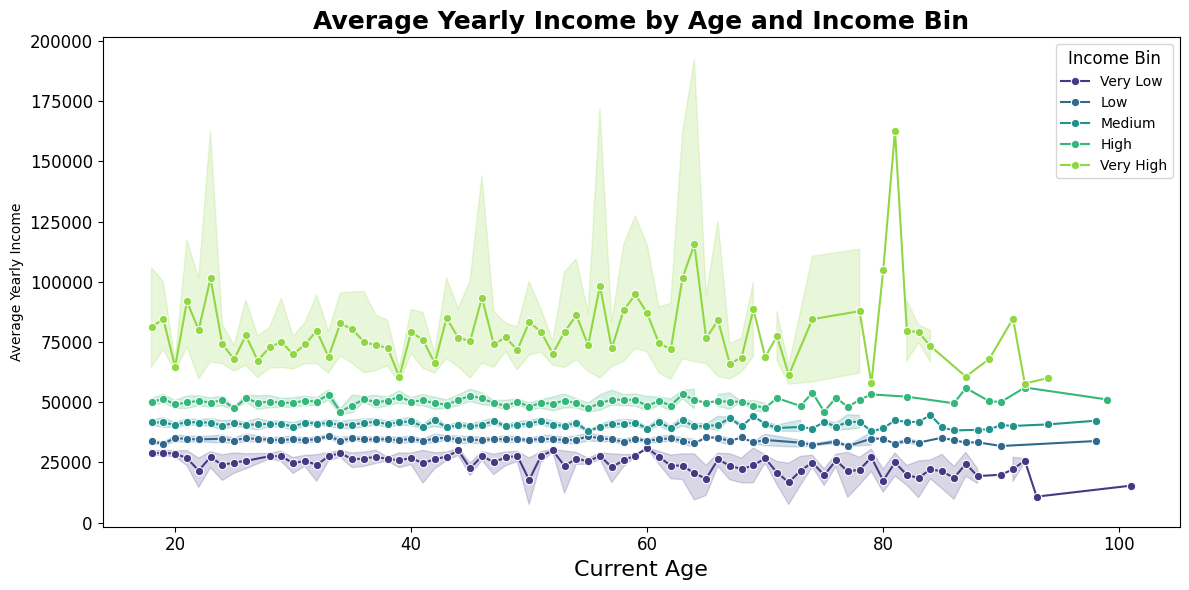

In [17]:
plt.figure(figsize=(12,6))

sns.lineplot(
    x='current_age',
    y='yearly_income',
    hue='income_bin', 
    data=df,
    palette='viridis',    
    marker='o'
)

plt.title("Average Yearly Income by Age and Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("Current Age", fontsize=16)
plt.ylabel("Average Yearly Income")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Income Bin", title_fontsize=12)
plt.tight_layout()
plt.show()